In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
import nsfg
import first
import thinkstats2
import thinkplot

In [3]:
resp = nsfg.ReadFemResp()

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

(array([3563., 1636., 1500.,  666.,  196.,   82.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

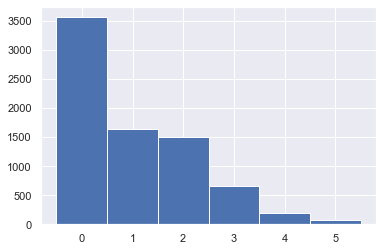

In [4]:
plt.hist(resp.numkdhh,align='left',bins=range(0,7,1))

In [5]:
pmf = resp.numkdhh.value_counts().sort_index()/len(resp.numkdhh)

Text(0, 0.5, 'PMF')

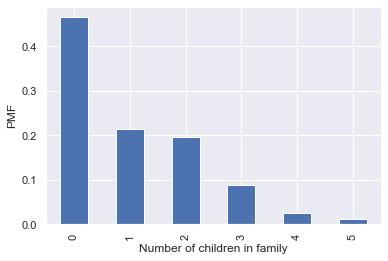

In [6]:
pmf.plot(kind='bar')
plt.xlabel('Number of children in family')
plt.ylabel('PMF')

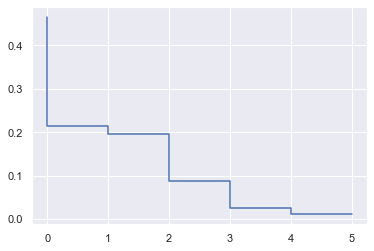

In [7]:
plt.step(pmf.index,pmf)

In [8]:
pmf = thinkstats2.Pmf(resp.numkdhh,label='Actual')

In [9]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [10]:
biased_pmf = BiasPmf(pmf,label='biased by asking children')

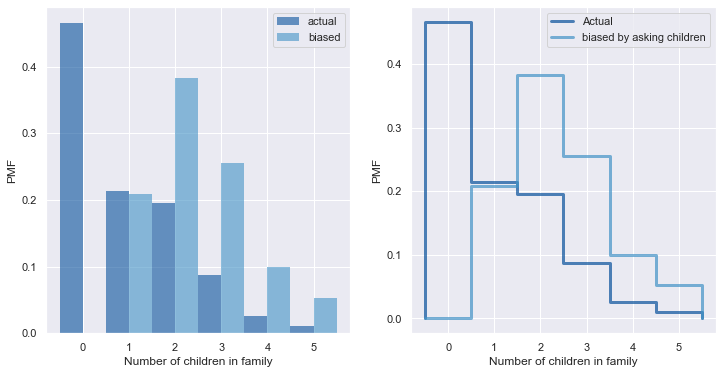

In [11]:
thinkplot.PrePlot(2,cols=2)
thinkplot.Hist(pmf,align='right',width=0.5,label='actual')
thinkplot.Hist(biased_pmf,align='left',width=0.5,label='biased')
plt.xlabel('Number of children in family')
plt.ylabel('PMF')
plt.legend()

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
plt.xlabel('Number of children in family')
plt.ylabel('PMF')
plt.legend()

Mean and standard deviation of actual responses v. biased results if we had surveyed children.

In [12]:
print('Actual response mean: ', pmf.Mean(), pmf.Std())
print('Biased mean: ', biased_pmf.Mean(), biased_pmf.Std())

Actual response mean:  1.024205155043831 1.1886396957670224
Biased mean:  2.403679100664282 1.083176857907326


In [13]:
#without using author's built-in functions
print(resp.numkdhh.mean(),resp.numkdhh.std())

1.024205155043831 1.1887174634203603


Summary: As we can see, the biased version that would result from giving children the same survey is significantly different from the actual result of the NSFG survey.  Naturally, we see a bias towards higher numbers of children in the family due to the size effect, and zero families with zero children.

In [14]:
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'Actual')

In [15]:
def pmf_mean(pmf):
    mean = 0
    for x,y in pmf.d.items():
        mean += x*y
    return mean

pmf_mean(pmf)

1.024205155043831

In [16]:
a = {1:1,2:2,3:3}
a.items()

dict_items([(1, 1), (2, 2), (3, 3)])

In [17]:
for x,y in a.items():
    print(x*y)

1
4
9


Exercise 3

In [24]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome==1]

In [25]:
live.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [27]:
v = live.caseid.value_counts()
multiple = live[live.caseid.isin(v.index[v>1])]
multiple_first = multiple[multiple.pregordr==1]
multiple_other = multiple[multiple.pregordr!=1]

In [28]:
multiple_first.prglngth.mean()

38.60436137071651

In [29]:
multiple_other.prglngth.mean()

38.54233494964566

In [30]:
preg.prglngth.mean()

29.531229309203265